In [17]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [2]:
def str2time(n):
    res = None
    if (len(n) == 4):
      res = datetime.time(hour=int(n[0:2]), minute=int(n[2:4]))
    elif (len(n) == 1):
      res = datetime.time(hour=int(n))  
    elif (len(n) == 2 and int(n) < 24):
      res = datetime.time(hour=int(n))  
    elif (len(n) == 2 and int(n) > 23):
      res = datetime.time(hour=0, minute=int(n))  
    else:
      res = datetime.time(hour=int(n[0:1]), minute=int(n[1:3]))
    return res

gl = pd.read_csv('Crime_Data_from_2010.csv', converters = {
    'Time Occurred': str2time
}, dtype = {
    'Area ID': 'category',
    'Area Name': 'category',
    'Reporting District': 'category',
    'Crime Code': 'category',
    'Crime Code Description': 'category',
    'MO Codes': 'category',
    'Weapon Used Code': 'category',
    'Weapon Description': 'category',
    'Victim Age': 'float32',
    'Victim Sex': 'category',
    'Victim Descent': 'category',
    'Premise Code': 'category',
    'Premise Description': 'category',
    'Status Code': 'category',
    'Status Description': 'category',
    'Crime Code 1': 'category',
    'Crime Code 2': 'category',
    'Crime Code 3': 'category',
    'Crime Code 4': 'category',
    'Cross Street': 'category',
    'Address': 'category'
}, parse_dates = ['Date Reported', 'Date Occurred'])
gl.dtypes

DR Number                          int64
Date Reported             datetime64[ns]
Date Occurred             datetime64[ns]
Time Occurred                     object
Area ID                         category
Area Name                       category
Reporting District              category
Crime Code                      category
Crime Code Description          category
MO Codes                        category
Victim Age                       float32
Victim Sex                      category
Victim Descent                  category
Premise Code                    category
Premise Description             category
Weapon Used Code                category
Weapon Description              category
Status Code                     category
Status Description              category
Crime Code 1                    category
Crime Code 2                    category
Crime Code 3                    category
Crime Code 4                    category
Address                         category
Cross Street    

In [3]:
gl.memory_usage(index = True, deep = True)

Index                           128
DR Number                  13536448
Date Reported              13536448
Date Occurred              13536448
Time Occurred              81218688
Area ID                     1693935
Area Name                   1694067
Reporting District          3503579
Crime Code                  3397572
Crime Code Description      3401052
MO Codes                   47749989
Victim Age                  6768224
Victim Sex                  1692506
Victim Descent              1693856
Premise Code                3413192
Premise Description         3418930
Weapon Used Code            1699416
Weapon Description          1700453
Status Code                 1692907
Status Description          1692614
Crime Code 1                3397992
Crime Code 2                3397572
Crime Code 3                1697914
Crime Code 4                1693036
Address                    16073829
Cross Street                4622606
Location                  129821014
dtype: int64

In [4]:
occured = []
for x in range(len(gl.index)):
  occured.append(datetime.datetime.combine(gl['Date Occurred'][x], gl['Time Occurred'][x]))
gl['Occured'] = occured

gl.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Occured
0,1208575,2013-03-14,2013-03-11,18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,AO,Adult Other,626,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",2013-03-11 18:00:00
1,102005556,2010-01-25,2010-01-22,23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",2010-01-22 23:00:00
2,418,2013-03-19,2013-03-18,20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",2013-03-18 20:30:00
3,101822289,2010-11-11,2010-11-10,18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",2010-11-10 18:00:00
4,42104479,2014-01-11,2014-01-04,23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,IC,Invest Cont,745,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",2014-01-04 23:00:00


In [5]:
gl['weekday'] = gl['Date Occurred'].transform(lambda x: x.strftime('%a'))

In [6]:
by_dw = gl.groupby('weekday')[['Crime Code']].count()
by_dw.columns = ['crimes']
    
by_dw.style.bar(vmin=0)

,crimes
weekday,
Fri,261154
Mon,241094
Sat,243302
Sun,232089
Thu,237834
Tue,236998
Wed,239585


In [7]:
by_dw = gl[['weekday', 'Area Name']].value_counts().reset_index()
by_dw.rename(columns={0: 'freq'}, inplace=True)

by_dw

,weekday,Area Name,freq
0,Fri,77th Street,17625
1,Mon,77th Street,17163
2,Sat,77th Street,16825
3,Sun,77th Street,16791
4,Wed,77th Street,16749
...,...,...,...
142,Mon,Hollenbeck,8718
143,Sun,West LA,8535
144,Tue,Hollenbeck,8525
145,Wed,Hollenbeck,8489


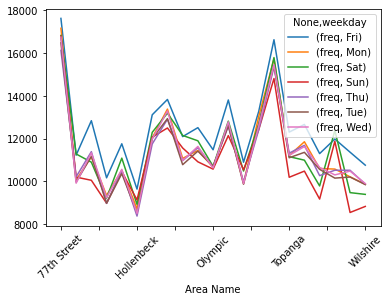

In [11]:
d = pd.pivot_table(by_dw, index='Area Name', columns='weekday', aggfunc='sum')

d.plot(kind='line', rot=45);

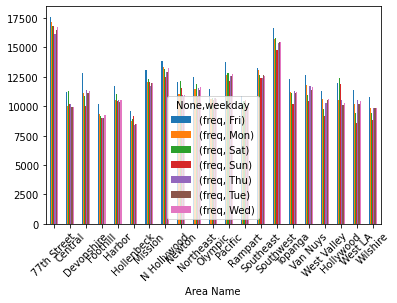

In [10]:
d.plot(kind='bar', rot=45);

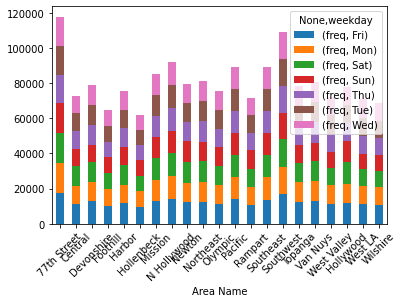

In [9]:
d.plot(kind='bar', rot=45, stacked=True);

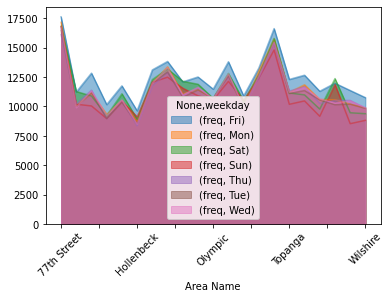

In [13]:
d.plot(kind='area', rot=45, stacked=False);

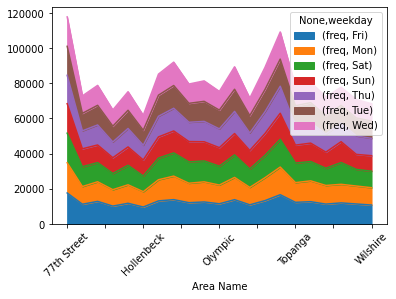

In [12]:
d.plot(kind='area', rot=45, stacked=True);

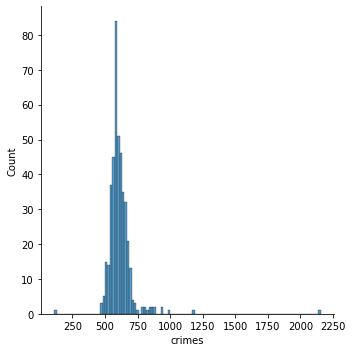

In [21]:
df = gl[gl['weekday'] == 'Fri'].groupby('Date Occurred')[['Crime Code']].count()
df.columns = ['crimes']

sns.displot(df['crimes']);

In [14]:
by_distr = gl.groupby('Area Name')[['Crime Code']].count()
by_distr.columns = ['crimes']
    
by_distr.style.bar(vmin=0)

,crimes
Area Name,
77th Street,117760
Central,72825
Devonshire,78789
Foothill,64832
Harbor,75203
Hollenbeck,61771
Mission,85207
N Hollywood,92011
Newton,79565


In [16]:
by_distr = gl[(gl['Date Occurred'] >= '1/1/2010') & (gl['Date Occurred'] <= '12/31/2010')].groupby('Area Name')[['Crime Code']].count()
by_distr.columns = ['crimes']
    
by_distr.style.bar(vmin=0)

,crimes
Area Name,
77th Street,14413
Central,7136
Devonshire,10603
Foothill,9303
Harbor,9561
Hollenbeck,7377
Mission,10525
N Hollywood,11334
Newton,9967
